In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
x = np.linspace(-10, 10, 50)
print(x)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [22]:
x_relu = tf.nn.relu(x)
print(x_relu)
x_sigmoid = tf.nn.sigmoid(x)
x_tanh = tf.nn.tanh(x)
x_leak_relu = tf.nn.leaky_relu(x)
x_softplus = tf.nn.softplus(x)

Tensor("Relu_2:0", shape=(50,), dtype=float64)


In [28]:
with tf.Session() as sess:
    y_relu = sess.run(x_relu)
    y_sigmoid = sess.run(x_sigmoid)
    y_tanh = sess.run(x_tanh)
    y_leak_relu = sess.run(x_leak_relu)
    y_softplus = sess.run(x_softplus)

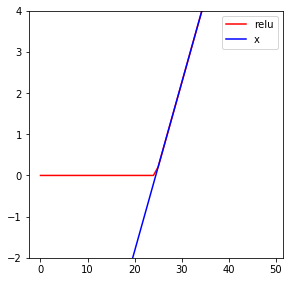

In [34]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_relu, c='red', label='relu')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

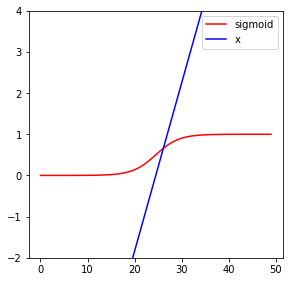

In [33]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_sigmoid, c='red', label='sigmoid')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

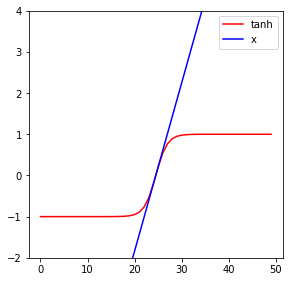

In [32]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_tanh, c='red', label='tanh')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

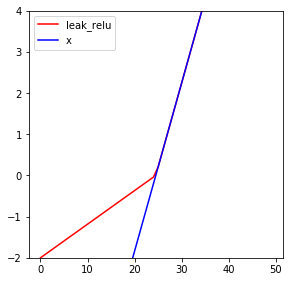

In [35]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_leak_relu, c='red', label='leak_relu')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

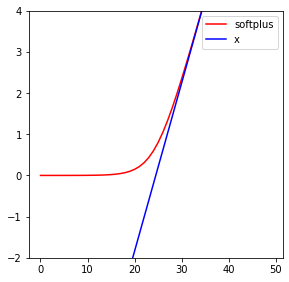

In [36]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_softplus, c='red', label='softplus')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()
